In [1]:
import glob
import librosa
import pandas as pd


filepaths = sorted(glob.glob(".archive/*.csv"))
dfs = []

for fp in filepaths:
    df = pd.read_csv(fp).filter(["filepath_deg", "mos"])
    db = fp.lstrip(".archive/").rstrip(".csv")
    df["db"] = db
    df = df.reindex(columns=["db", "filepath_deg", "mos"])
    dfs.append(df)

In [2]:
all_df = pd.concat(dfs, axis=0)
all_df

,db,filepath_deg,mos
0,Blizzard_2008_TRAIN,Blizzard_2008/A_submission_directory_english_a...,4.727273
1,Blizzard_2008_TRAIN,Blizzard_2008/B_submission_directory_english_a...,4.383333
2,Blizzard_2008_TRAIN,Blizzard_2008/C_submission_directory_english_a...,2.404167
3,Blizzard_2008_TRAIN,Blizzard_2008/D_submission_directory_english_a...,2.391176
4,Blizzard_2008_TRAIN,Blizzard_2008/E_submission_directory_english_a...,2.253571
...,...,...,...
1995,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_B01_VC...,3.250000
1996,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N17_VC...,3.000000
1997,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N13_VC...,2.250000
1998,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N03_VC...,2.250000


In [3]:
all_df = all_df[~(all_df.mos > 5)]
all_df

,db,filepath_deg,mos
0,Blizzard_2008_TRAIN,Blizzard_2008/A_submission_directory_english_a...,4.727273
1,Blizzard_2008_TRAIN,Blizzard_2008/B_submission_directory_english_a...,4.383333
2,Blizzard_2008_TRAIN,Blizzard_2008/C_submission_directory_english_a...,2.404167
3,Blizzard_2008_TRAIN,Blizzard_2008/D_submission_directory_english_a...,2.391176
4,Blizzard_2008_TRAIN,Blizzard_2008/E_submission_directory_english_a...,2.253571
...,...,...,...
1995,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_B01_VC...,3.250000
1996,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N17_VC...,3.000000
1997,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N13_VC...,2.250000
1998,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N03_VC...,2.250000


In [4]:
def get_duration(fp: str):
	x, sr = librosa.load(fp)
	return len(x)/sr

all_df["duration"] = all_df["filepath_deg"].map(lambda x: get_duration(x))
all_df

In [ ]:
all_df = all_df[(all_df.duration) > 1 & (all_df.duration < 40)]
all_df

,db,filepath_deg,mos,duration
0,Blizzard_2008_TRAIN,Blizzard_2008/A_submission_directory_english_a...,4.727273,2.684036
1,Blizzard_2008_TRAIN,Blizzard_2008/B_submission_directory_english_a...,4.383333,2.821270
2,Blizzard_2008_TRAIN,Blizzard_2008/C_submission_directory_english_a...,2.404167,4.545079
3,Blizzard_2008_TRAIN,Blizzard_2008/D_submission_directory_english_a...,2.391176,3.129977
4,Blizzard_2008_TRAIN,Blizzard_2008/E_submission_directory_english_a...,2.253571,2.791791
...,...,...,...,...
1995,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_B01_VC...,3.250000,1.780045
1996,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N17_VC...,3.000000,1.765986
1997,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N13_VC...,2.250000,2.652880
1998,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N03_VC...,2.250000,3.010023


In [4]:
all_df.to_csv("TRAIN.csv", index=False)

<Axes: >

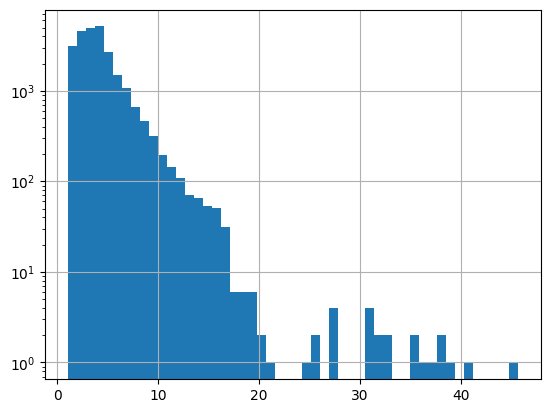

In [14]:
all_df.duration.hist(bins=50, log=True)

<Axes: >

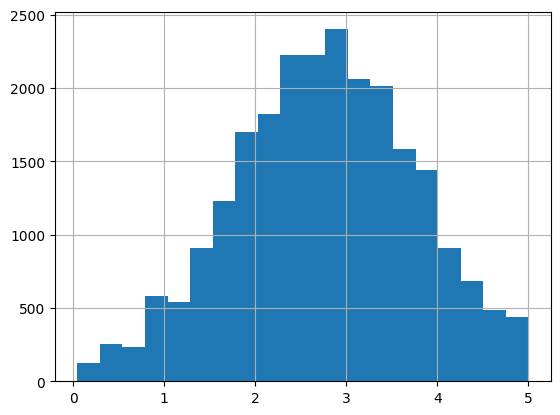

In [18]:
all_df.mos.hist(bins=20)

In [1]:
import pandas as pd

df=pd.read_csv("TRAIN.csv")
df

,db,filepath_deg,mos,duration
0,Blizzard_2008_TRAIN,Blizzard_2008/A_submission_directory_english_a...,4.727273,2.684036
1,Blizzard_2008_TRAIN,Blizzard_2008/B_submission_directory_english_a...,4.383333,2.821270
2,Blizzard_2008_TRAIN,Blizzard_2008/C_submission_directory_english_a...,2.404167,4.545079
3,Blizzard_2008_TRAIN,Blizzard_2008/D_submission_directory_english_a...,2.391176,3.129977
4,Blizzard_2008_TRAIN,Blizzard_2008/E_submission_directory_english_a...,2.253571,2.791791
...,...,...,...,...
25318,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_B01_VC...,3.250000,1.780045
25319,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N17_VC...,3.000000,1.765986
25320,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N13_VC...,2.250000,2.652880
25321,VCC_2018_SPO_VAL,VCC_2018/mnt_sysope_test_files_testVCC2_N03_VC...,2.250000,3.010023


In [11]:
print(f"TRAIN: {df[df.db.str.contains('TRAIN')].duration.sum() / 60 / 60} hours")
print(f"VAL: {df[df.db.str.contains('VAL')].duration.sum() / 60 / 60} hours")

TRAIN: 21.97338526077097 hours
VAL: 7.262577009322246 hours
